In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
iris=load_iris()
x=iris.data
y=iris.target

In [5]:
scaler =StandardScaler() #give the mean and sutract the one means to get one matrix
X_scaled=scaler.fit_transform(x)

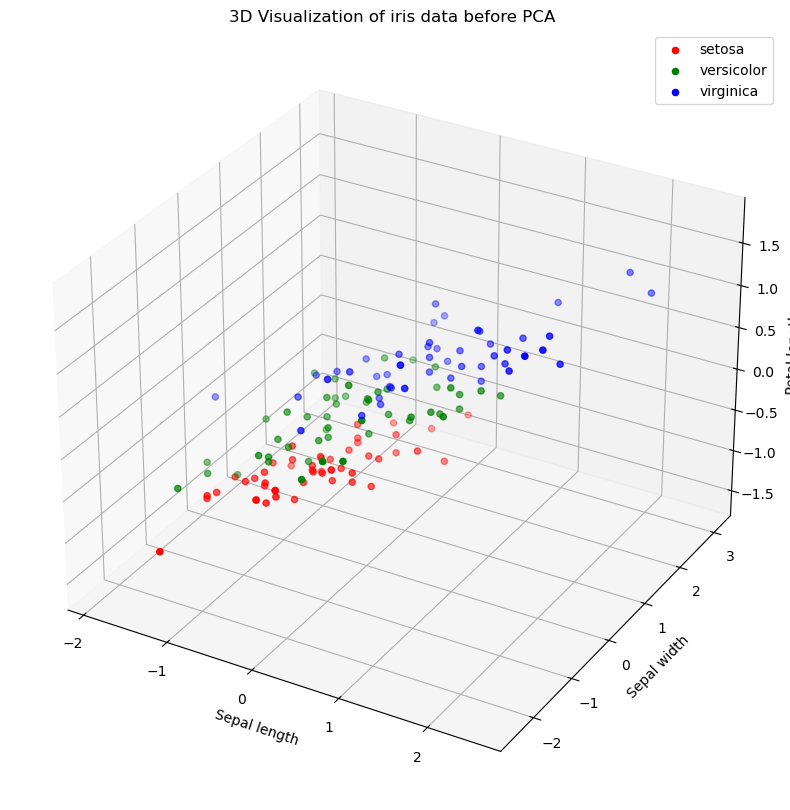

In [7]:
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
colors = ['red','green','blue']
labels = iris.target_names

for i in range(len(colors)):
    ax.scatter(X_scaled[y==i,0],X_scaled[y==i,1],X_scaled[y==i,2],color=colors[i],label=labels[i])
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')  
ax.set_zlabel('Petal length')
ax.set_title('3D Visualization of iris data before PCA ')
plt.legend()
plt.show()

In [8]:
cov_matrix=np.cov(X_scaled.T)
print(cov_matrix)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [9]:
eigenvalues,eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:",eigenvalues)
print("Eigenvectors:\n",eigenvectors)

Eigenvalues: [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [10]:
U, S, Vt =np.linalg.svd(X_scaled,full_matrices=False)
print("Singular Values : ",S)

Singular Values :  [20.92306556 11.7091661   4.69185798  1.76273239]


In [14]:
pca = PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

In [16]:
explained_varience=pca.explained_variance_ratio_
print(f"Explained Varience by PC1: {explained_varience[0]:.2f}" )
print(f"Explained Varience by PC2: {explained_varience[1]:.2f}" )

Explained Varience by PC1: 0.73
Explained Varience by PC2: 0.23


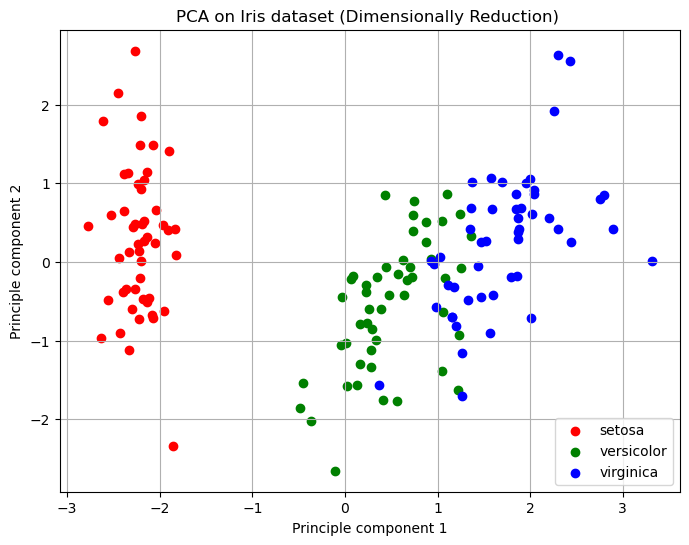

In [19]:
plt.figure(figsize=(8,6))
colors = ['red','green','blue']
labels = iris.target_names

for i in range(len(colors)):
    plt.scatter(X_pca[y==i,0],X_pca[y==i,1],color=colors[i],label=labels[i])
plt.xlabel('Principle component 1')
plt.ylabel('Principle component 2')  

plt.title('PCA on Iris dataset (Dimensionally Reduction) ')
plt.legend()
plt.grid()
plt.show()

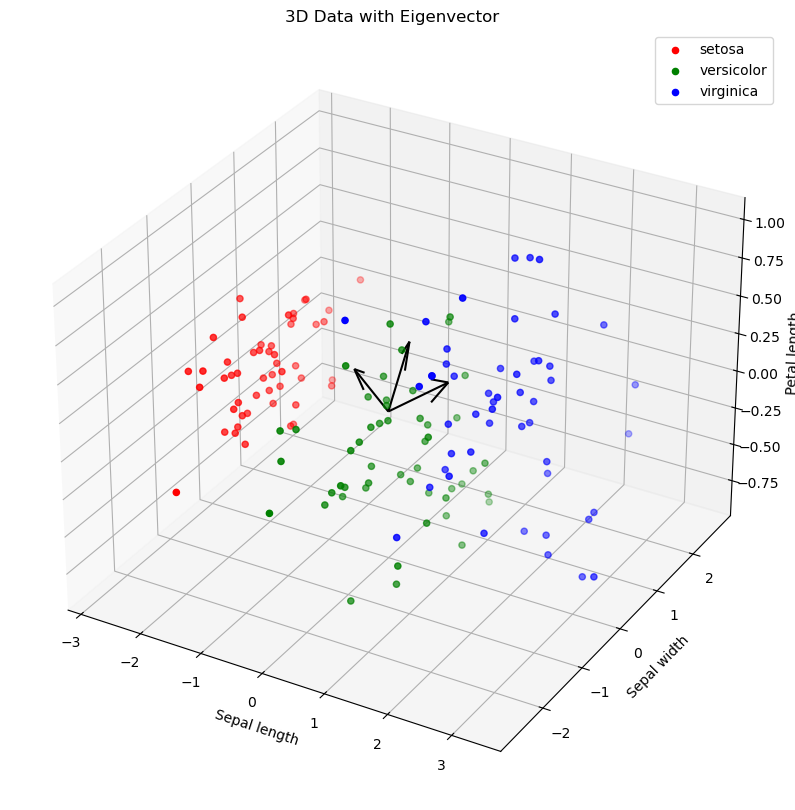

In [20]:
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
pca =PCA(n_components=3)
X_reduced_3d=pca.fit_transform(X_scaled)
for i in range(len(colors)):
    ax.scatter(X_reduced_3d[y==i,0],X_reduced_3d[y==i,1],X_reduced_3d[y==i,2],color=colors[i],label=labels[i])
for i in range(3):
    ax.quiver(0,0,0,pca.components_[i,0],pca.components_[i,1],pca.components_[i,2],color='k')
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')  
ax.set_zlabel('Petal length')
ax.set_title('3D Data with Eigenvector ')
plt.legend()
plt.show()